1. Instalação do TensorFlow e importações

In [33]:
#!pip install tensorflow
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import pandas as pd

print(tf.__version__)

2.19.0


Criando e plotando a matriz confusão com labels para positivo e negativo

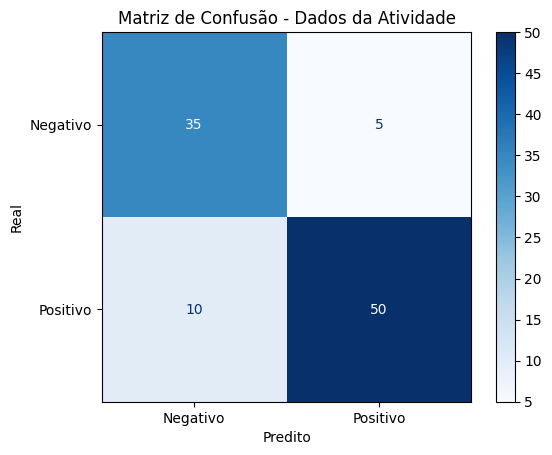

In [34]:
# Seus dados:
VP = 50
FN = 10
FP = 5
VN = 35

# Criar as listas de dados
y_true = [1]*VP + [1]*FN + [0]*FP + [0]*VN
y_pred = [1]*VP + [0]*FN + [1]*FP + [0]*VN

# Gerar a matriz
cm = confusion_matrix(y_true, y_pred)

# Definir os labels personalizados
labels = ["Negativo", "Positivo"]

# Mostrar a matriz com labels
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
disp.plot(cmap=plt.cm.Blues, values_format='d')  # 'd' para mostrar números inteiros
plt.title('Matriz de Confusão - Dados da Atividade')
plt.xlabel('Predito')
plt.ylabel('Real')
plt.show()


Definindo as funções métricas

In [35]:
# Funções de Métricas
def sensibilidade(VP, FN):
    return VP / (VP + FN)

def especificidade(VN, FP):
    return VN / (VN + FP)

def acuracia(VP, VN, N):
    return (VP + VN) / N

def precisao(VP, FP):
    return VP / (VP + FP)

def f_score(precisao_valor, sensibilidade_valor):
    return 2 * (precisao_valor * sensibilidade_valor) / (precisao_valor + sensibilidade_valor)


Calculando as métricas

In [36]:
# Cálculo das métricas

# Número total de amostras
N = VP + FN + FP + VN

# Calcular cada métrica
sensibilidade_valor = sensibilidade(VP, FN)
especificidade_valor = especificidade(VN, FP)
acuracia_valor = acuracia(VP, VN, N)
precisao_valor = precisao(VP, FP)
fscore_valor = f_score(precisao_valor, sensibilidade_valor)

# Mostrar os resultados
print(f"Sensibilidade (Recall): {sensibilidade_valor:.4f}")
print(f"Especificidade: {especificidade_valor:.4f}")
print(f"Acurácia: {acuracia_valor:.4f}")
print(f"Precisão: {precisao_valor:.4f}")
print(f"F-Score: {fscore_valor:.4f}")


Sensibilidade (Recall): 0.8333
Especificidade: 0.8750
Acurácia: 0.8500
Precisão: 0.9091
F-Score: 0.8696


Agora usando a função avaliar_modelo()

In [37]:
def avaliar_modelo(VP, FN, FP, VN):
    """Calcula as principais métricas de avaliação de um modelo de classificação binária.

    Parâmetros:
    -----------
    VP : int
        Verdadeiros Positivos: casos corretamente classificados como positivos.
    FN : int
        Falsos Negativos: casos positivos erroneamente classificados como negativos.
    FP : int
        Falsos Positivos: casos negativos erroneamente classificados como positivos.
    VN : int
        Verdadeiros Negativos: casos corretamente classificados como negativos.

    Retorna:
    --------
    dict
        Dicionário com as métricas calculadas:
        - 'Sensibilidade (Recall)': Proporção de positivos reais identificados corretamente.
            Fórmula: VP / (VP + FN)
        - 'Especificidade': Proporção de negativos reais identificados corretamente.
            Fórmula: VN / (VN + FP)
        - 'Acurácia': Proporção de classificações corretas (tanto positivas quanto negativas).
            Fórmula: (VP + VN) / (VP + FN + FP + VN)
        - 'Precisão': Proporção de verdadeiros positivos entre todos os preditos como positivos.
            Fórmula: VP / (VP + FP)
        - 'F-Score': Média harmônica entre Precisão e Sensibilidade (balanceamento).
            Fórmula: 2 * (Precisão * Sensibilidade) / (Precisão + Sensibilidade)

    Levanta:
    --------
    ValueError
        Se qualquer denominador for zero (ex.: divisão por zero).

    Exemplo:
    --------
    >>> avaliar_modelo(50, 10, 5, 35)
    {
        'Sensibilidade (Recall)': 0.8333,
        'Especificidade': 0.875,
        'Acurácia': 0.85,
        'Precisão': 0.9091,
        'F-Score': 0.8696
    }
    """
    try:
        # Verifica divisão por zero
        if (VP + FN) == 0 or (VN + FP) == 0 or (VP + FP) == 0:
            raise ValueError("Divisão por zero - verifique os valores de VP, FN, FP, VN.")

        # Cálculo das métricas
        sensibilidade_valor = VP / (VP + FN)
        especificidade_valor = VN / (VN + FP)
        acuracia_valor = (VP + VN) / (VP + FN + FP + VN)
        precisao_valor = VP / (VP + FP)
        fscore_valor = 2 * (precisao_valor * sensibilidade_valor) / (precisao_valor + sensibilidade_valor)

        return {
            "Sensibilidade (Recall)": round(sensibilidade_valor, 4),
            "Especificidade": round(especificidade_valor, 4),
            "Acurácia": round(acuracia_valor, 4),
            "Precisão": round(precisao_valor, 4),
            "F-Score": round(fscore_valor, 4)
        }

    except Exception as e:
        print(f"Erro: {e}")
        return None

Rodando a função e mostrando os resultados

In [38]:
# Executando a função e mostrando resultados
resultados = avaliar_modelo(VP, FN, FP, VN)
print(resultados)


{'Sensibilidade (Recall)': 0.8333, 'Especificidade': 0.875, 'Acurácia': 0.85, 'Precisão': 0.9091, 'F-Score': 0.8696}


Transformando os resultados em tabela com pandas

In [39]:
# Criando o DataFrame
df_resultados = pd.DataFrame(resultados.items(), columns=["Métrica", "Valor"])

# Exibindo o DataFrame
print(df_resultados)


                  Métrica   Valor
0  Sensibilidade (Recall)  0.8333
1          Especificidade  0.8750
2                Acurácia  0.8500
3                Precisão  0.9091
4                 F-Score  0.8696
